In [46]:
import acquire as a
import json

import matplotlib.pyplot as plt
import pandas as pd
import nltk
import unicodedata
import re
import seaborn as sns
from wordcloud import WordCloud

In [2]:
repos = open('data2.json')
repos = json.load(repos)

In [3]:
df = pd.json_normalize(repos)

In [4]:
df

,repo,language,readme_contents
0,CSSEGISandData/COVID-19,None,# COVID-19 Data Repository by the Center for S...
1,covid19india/covid19india-react,JavaScript,"<p align=""center"">\n<img src=""https://reposito..."
2,nytimes/covid-19-data,None,# Coronavirus (Covid-19) Data in the United St...
3,tokyo-metropolitan-gov/covid19,Vue,# 東京都 新型コロナウイルス感染症対策サイト\n\n[![production deplo...
4,owid/covid-19-data,Python,# COVID-19 Dataset by _Our World in Data_ \n[!...
...,...,...,...
294,ue/neleryasak,HTML,### For data upgrade regarding risk value;\n\n...
295,brentjackson/OpenRespirator,None,# OpenRespirator\nA shortage of intubation dev...
296,nasa-jpl-memex/GeoParser,JavaScript,"\n<p align=""center"">\n <img src=""https://raw...."
297,LeninGangwal/Big-Basket-Delivery-Slots,Python,# Big-Basket-Delivery-Slots\nIt's a major hass...


In [5]:
df = pd.DataFrame(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             299 non-null    object
 1   language         263 non-null    object
 2   readme_contents  299 non-null    object
dtypes: object(3)
memory usage: 7.1+ KB


In [6]:
df.shape

(299, 3)

<hr style="border:2px solid black"> </hr>

# Prepare

In [7]:
import prepare

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/natasharivers/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/natasharivers/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
df = df.rename({'readme_contents':'original'},axis=1)
df['clean'] = df.original.apply(prepare.basic_clean)
df['lemmatized'] = df.clean.apply(prepare.lemmatize)
df['stopwords_removed'] = df.lemmatized.apply(prepare.remove_stopwords)
df.head()

,repo,language,original,clean,lemmatized,stopwords_removed
0,CSSEGISandData/COVID-19,None,# COVID-19 Data Repository by the Center for S...,covid19 data repository by the center for sys...,covid19 data repository by the center for syst...,covid19 data repository center system science ...
1,covid19india/covid19india-react,JavaScript,"<p align=""center"">\n<img src=""https://reposito...",p aligncenter\nimg srchttpsrepositoryimagesgit...,p aligncenter img srchttpsrepositoryimagesgith...,p aligncenter img srchttpsrepositoryimagesgith...
2,nytimes/covid-19-data,None,# Coronavirus (Covid-19) Data in the United St...,coronavirus covid19 data in the united states...,coronavirus covid19 data in the united state t...,coronavirus covid19 data united state primary ...
3,tokyo-metropolitan-gov/covid19,Vue,# 東京都 新型コロナウイルス感染症対策サイト\n\n[![production deplo...,\n\nproduction deployhttpsgithubcomtokyometr...,production deployhttpsgithubcomtokyometropolit...,production deployhttpsgithubcomtokyometropolit...
4,owid/covid-19-data,Python,# COVID-19 Dataset by _Our World in Data_ \n[!...,covid19 dataset by our world in data \nwebsit...,covid19 dataset by our world in data website s...,covid19 dataset world data website shieldsioht...


In [10]:
def clean(text):
    '''
    This function is a simplified text cleaning function
    '''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [11]:
#see the count for each language
df.language.value_counts()

#python appears to be the most used language

Python              72
JavaScript          48
Jupyter Notebook    36
HTML                24
TypeScript          10
R                   10
Vue                  7
Java                 6
C++                  5
Ruby                 5
Dart                 5
PHP                  4
CSS                  4
C#                   4
Kotlin               4
Go                   3
SCSS                 2
TeX                  2
Swift                2
F#                   1
G-code               1
Nextflow             1
Julia                1
Stan                 1
Elixir               1
Common Lisp          1
Objective-C          1
MATLAB               1
Shell                1
Name: language, dtype: int64

In [23]:
#drop duplicates and nulls
df = df.drop_duplicates().dropna()

In [24]:
#shape of df after removing nulls and dups
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 1 to 297
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   repo               260 non-null    object
 1   language           260 non-null    object
 2   original           260 non-null    object
 3   clean              260 non-null    object
 4   lemmatized         260 non-null    object
 5   stopwords_removed  260 non-null    object
dtypes: object(6)
memory usage: 14.2+ KB


In [12]:
#take a look at all python 
df[df.language == 'Python'].stopwords_removed

4      covid19 dataset world data website shieldsioht...
7      reverse engineering coronavirus sarscov2 start...
10     h1 aligncenter coronavirus tracker api h1 prov...
16     foldinghome covid19 effort repository contain ...
17     covid19 dataset coronavirus disease 2019 covid...
                             ...                        
287    note repo ha moved directly within covid19scen...
288    covid19historicaldatavisualization stand wuhan...
290    h4 aligncenter hrefhttpsgithubcommouadbhcorona...
293    reference httpswwwpyimagesearchcom20170911obje...
297    bigbasketdeliveryslots major hassle get delive...
Name: stopwords_removed, Length: 72, dtype: object

In [13]:
#python clean only
python_words = clean(' '.join(df[df.language == 'Python'].stopwords_removed))
python_words

'covid19 dataset world data website shieldsiohttpsimgshieldsiowebsiteupdowngreenredhttpshieldsiosvghttpsourworldindataorgcoronavirus datahttpsimgshieldsiobadgepublicdatapurplepublicdata open source love svg3httpsbadgesfrapsoftcomosv3opensourcesvgv103httpsgithubcomellerbrockopensourcebadges find data covid19 documentation publicdatapublicdata documentation data complete covid19 datasetpublicdatareadmemd data covid19 vaccinationspublicdatavaccinationsreadmemd data excess mortalitypublicdataexcessmortalityreadmemd development generalscriptsreadmemd development vaccinationsscriptsscriptsvaccinationsreadmemd development vaccination contribution guidelinesscriptsscriptsvaccinationscontributemd development testingscriptsscriptstestingreadmemd reverse engineering coronavirus sarscov2 start coronapycoronapy thoughtballoon background project applies technique reverse engineeringhttpsenwikipediaorgwikireverseengineering understand sarscov2httpsenwikipediaorgwikisevereacuterespiratorysyndromecoron

In [66]:
#clean java only
java_words = clean(' '.join(df[df.language == 'JavaScript'].stopwords_removed))

#clean Jupyter Notebook only
jupyter_words = clean(' '.join(df[df.language == 'Jupyter Notebook'].stopwords_removed))

#html clean only
html_words = clean(' '.join(df[df.language == 'HTML'].stopwords_removed))

#typescript clean only
type_words = clean(' '.join(df[df.language == 'TypeScript'].stopwords_removed))

#r clean only
r_words = clean(' '.join(df[df.language == 'R'].stopwords_removed))

#all clean text
all_words = clean(' '.join(df.stopwords_removed))

<hr style="border:2px solid black"> </hr>

# Explore

In [67]:
all_words.split()

['p',
 'aligncenter',
 'img',
 'srchttpsrepositoryimagesgithubusercontentcom24738651967519080869111ea94810732fb55380b',
 'width100',
 'p',
 'p',
 'aligncenter',
 'heres',
 'data',
 'hrefhttpsapicovid19indiaorgapia',
 'p',
 'setup',
 'yarn',
 'install',
 'yarn',
 'start',
 'contribution',
 'new',
 'contributing',
 'open',
 'source',
 'github',
 'guidehttpsguidesgithubcomactivitiescontributingtoopensource',
 'help',
 'get',
 'started',
 'please',
 'check',
 'contribution',
 'guidecontributingmd',
 'detail',
 'issue',
 'pull',
 'request',
 'work',
 'repository',
 'small',
 'subset',
 'work',
 'put',
 'together',
 'much',
 'larger',
 'pool',
 'voluntary',
 'effort',
 'contributed',
 'generous',
 'people',
 'around',
 'world',
 'reach',
 'u',
 'hellocovid19indiaorg',
 'production',
 'deployhttpsgithubcomtokyometropolitangovcovid19workflowsproduction20deploybadgesvgbranchmasterhttpsgithubcomtokyometropolitangovcovid19actionsqueryworkflow3a22productiondeploy22',
 'ogp',
 'builderhttpsgithubco

In [68]:
#turn all words into a series
#get value count of all words
pd.Series(all_words.split()).value_counts()

#removing stopwords would change this count

data                                   2136
covid19                                1520
de                                      973
case                                    836
file                                    575
                                       ... 
beginnen                                  1
httpsgithubcomdandarawyunity3dglobe       1
businessasusual                           1
manteniendo                               1
numsecondst1t0                            1
Length: 29604, dtype: int64

In [69]:
#create a series with words split and value counts for each word
python_freq = pd.Series(python_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
jupyter_freq = pd.Series(jupyter_words.split()).value_counts()
html_freq = pd.Series(html_words.split()).value_counts()
type_freq = pd.Series(type_words.split()).value_counts()
r_freq = pd.Series(r_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [70]:
python_freq

data                                             506
covid19                                          256
model                                            227
python                                           182
file                                             176
                                                ... 
parsobj                                            1
hrefhttpswwwyoutubecomwatchv5t35govvwgavideoa      1
hang                                               1
subboliverbsubabr                                  1
tikahttptikaapacheorg                              1
Length: 9973, dtype: int64

In [73]:
#combine all frequency into single Series
word_counts = pd.concat([python_freq, java_freq, jupyter_freq, html_freq, type_freq, r_freq, all_freq], axis=1).fillna(0).astype(int)

#word count for each language type
word_counts.columns = ['python', 'java', 'jupyter', 'html', 'typescript', 'r', 'all']

In [74]:
#sorted by most common to most common in 'all' 
word_counts.sort_values('all', ascending=False).head(20)

,python,java,jupyter,html,typescript,r,all
data,506,383,461,216,26,157,2136
covid19,256,604,281,154,11,67,1520
de,47,67,588,8,10,57,973
case,131,203,181,113,4,52,836
file,176,63,50,42,18,16,575
run,174,63,53,60,13,3,534
use,136,74,57,43,14,12,524
1,87,89,63,75,1,10,517
country,129,160,50,30,3,15,506
model,227,23,153,26,0,2,493


<hr style="border:1px solid black"> </hr>

# Visualize

In [75]:
#dictate size of figure
plt.rc('figure', figsize=(14, 8))
plt.style.use('seaborn-darkgrid')

Text(0, 0.5, 'Word')

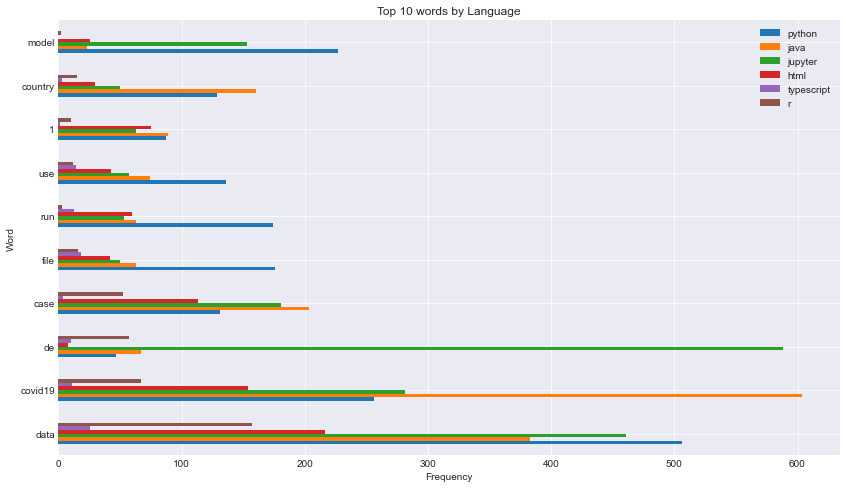

In [77]:
#using 'all' languages
#visualize top 10
word_counts.sort_values('all', ascending=False).head(10)[['python', 'java', 'jupyter', 'html', 'typescript', 'r']].plot.barh()

plt.title('Top 10 words by Language')
plt.xlabel('Frequency')
plt.ylabel('Word')

In [78]:
#visual proportions
#axis=1 in .apply means row by row
word_counts.sort_values(by='all', ascending=False).head(10).apply(lambda row: row/ row['all'],axis=1)

,python,java,jupyter,html,typescript,r,all
data,0.236891,0.179307,0.215824,0.101124,0.012172,0.073502,1.0
covid19,0.168421,0.397368,0.184868,0.101316,0.007237,0.044079,1.0
de,0.048304,0.068859,0.604317,0.008222,0.010277,0.058582,1.0
case,0.156699,0.242823,0.216507,0.135167,0.004785,0.062201,1.0
file,0.306087,0.109565,0.086957,0.073043,0.031304,0.027826,1.0
run,0.325843,0.117978,0.099251,0.112360,0.024345,0.005618,1.0
use,0.259542,0.141221,0.108779,0.082061,0.026718,0.022901,1.0
1,0.168279,0.172147,0.121857,0.145068,0.001934,0.019342,1.0
country,0.254941,0.316206,0.098814,0.059289,0.005929,0.029644,1.0
model,0.460446,0.046653,0.310345,0.052738,0.000000,0.004057,1.0


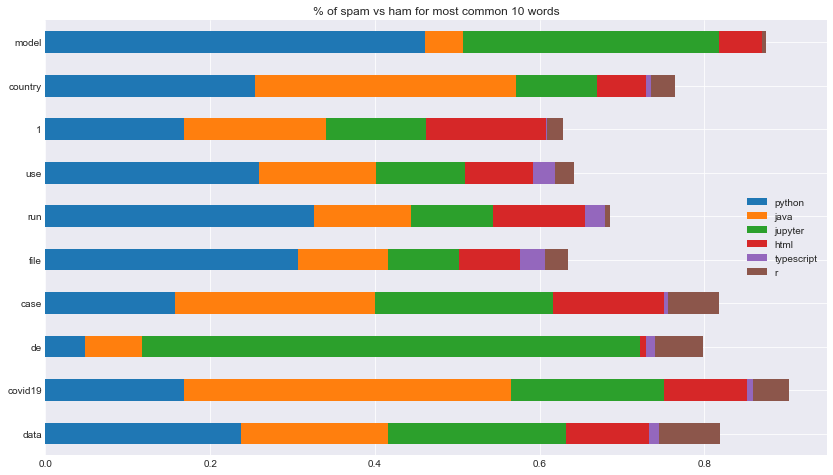

In [79]:
#visualize all languages as percent of 'all'
(word_counts.sort_values(by='all', ascending=False)
 .head(10)
 .apply(lambda row: row/ row['all'],axis=1)
 .drop(columns='all')
 .plot.barh(stacked=True))
plt.title('% of spam vs ham for most common 10 words')
None

<hr style="border:1px solid black"> </hr>

# n-grams

### Python

In [80]:
#see most common bigrams in python languages
pd.Series(nltk.bigrams(python_words.split())).value_counts()

(default, null)                               66
(varchar255, default)                         53
(td, aligncentera)                            49
(nbsp, nbsp)                                  42
(pip, install)                                41
                                              ..
(httpswwwlfduciedugohlkepythonlibs, still)     1
(java9, 10)                                    1
(pretend, incident)                            1
(git, add)                                     1
(placebased, activity)                         1
Length: 29512, dtype: int64

### JavaScript

In [45]:
#see most common bigrams in JavaScript language
pd.Series(nltk.bigrams(java_words.split())).value_counts()

(width100px, altbr)                                                                              109
(td, aligncentera)                                                                               109
(novel, coronavirus)                                                                              53
(coronavirus, covid19)                                                                            42
(watson, assistant)                                                                               41
                                                                                                ... 
(4, ankitchouhan1020httpsgithubcomankitchouhan1020coronahttpsgithubcomankitchouhan1020corona)      1
(macedonia, madagascar)                                                                            1
(repohttpsgithubcomworkaholic7covid19visuals, react)                                               1
(srchttpswwwworldometersinfoimgflagssmalltngmflaggif, altgermany)                          

### Jupyter Notebook

In [44]:
#see most common bigrams in JupyterNotebook language
pd.Series(nltk.bigrams(jupyter_words.split())).value_counts()

(data, product)             95
(por, el)                   59
(de, la)                    55
(ministerio, de)            52
(de, salud)                 52
                            ..
(bsd, 3clause)               1
(equipo, 20192020)           1
(variable, governmental)     1
(geographical, dataset)      1
(refine, country)            1
Length: 16883, dtype: int64

### HTML

In [43]:
#see most common bigrams in HTML language
pd.Series(nltk.bigrams(html_words.split())).value_counts()

(confirmed, case)           28
(width100px, altbr)         23
(td, aligncentera)          23
(ci, download)              21
(health, system)            19
                            ..
(tensorflow, page)           1
(world, wanted)              1
(another, directory)         1
(dataset, understanding)     1
(mining, series)             1
Length: 11131, dtype: int64

### TypeScript

In [82]:
#see most common bigrams in TypeScript language
pd.Series(nltk.bigrams(type_words.split())).value_counts()

(td, aligncentera)                                                                     80
(width100px, altbr)                                                                    80
(titleideas, planning)                                                                 28
(titlecodeatd, td)                                                                     26
(planning, feedbacka)                                                                  21
                                                                                       ..
(cant, provide)                                                                         1
(img, srchttpsapinetlifycomapiv1badges186f33aae78e4516bbb04a44e08eeafcdeploystatus)     1
(altbr, subbburhan)                                                                     1
(styledisplay, flex)                                                                    1
(hrefhttpsgithubcomreach4helpreach4helpcommitsauthorjpmarques66, titlecodea)            1
Length: 35

### R

In [42]:
#see most common bigrams in R language
pd.Series(nltk.bigrams(r_words.split())).value_counts()

(daily, cumulative)                                  18
(data, source)                                       16
(contributor, university)                            10
(de, casos)                                          10
(case, death)                                        10
                                                     ..
(country, region)                                     1
(end, r)                                              1
(height250px, badge)                                  1
(montreal, styledisplayinlineblockmarginright8px)     1
(generates, top10)                                    1
Length: 3835, dtype: int64

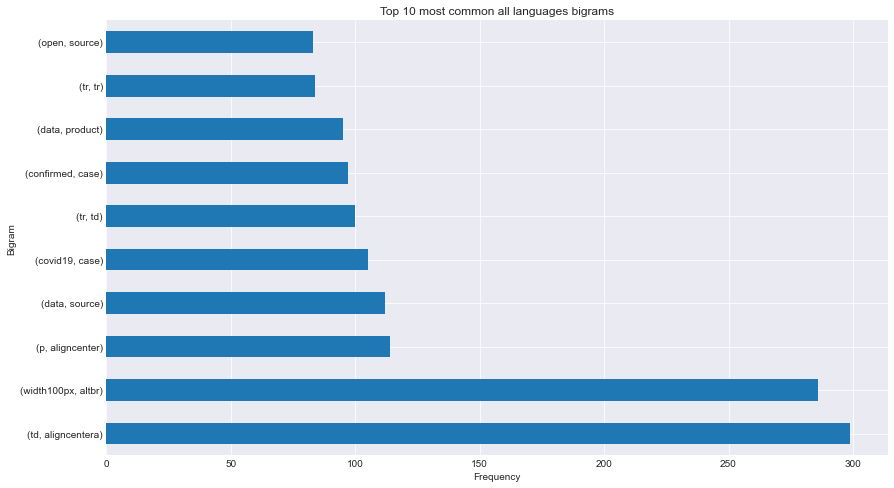

In [83]:
#visualize top ten for all languages
pd.Series(nltk.bigrams(all_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common all languages bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
None

<hr style="border:1px solid black"> </hr>

# Word Clouds

### Python

(-0.5, 799.5, 599.5, -0.5)

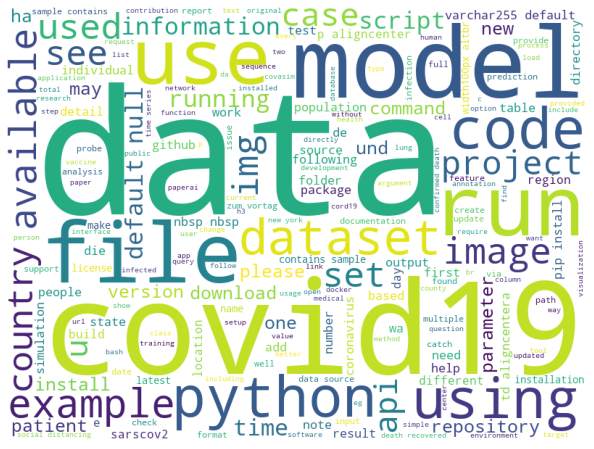

In [61]:
img = WordCloud(background_color='white', width=800, height=600).generate(python_words)
plt.imshow(img)
plt.axis('off')

### JavaScript

(-0.5, 799.5, 599.5, -0.5)

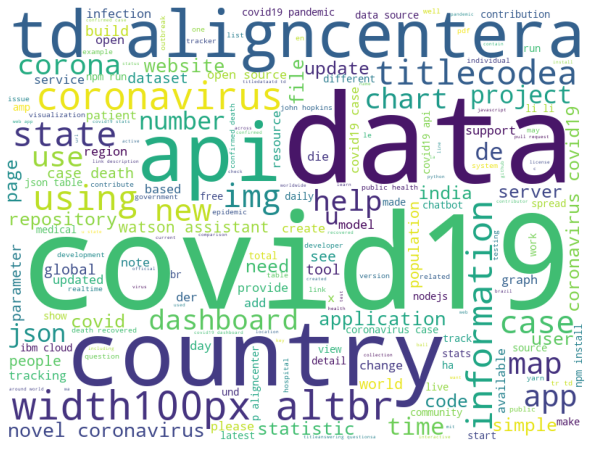

In [62]:
img = WordCloud(background_color='white', width=800, height=600).generate(java_words)
plt.imshow(img)
plt.axis('off')

### Jupyter Notebook

(-0.5, 799.5, 599.5, -0.5)

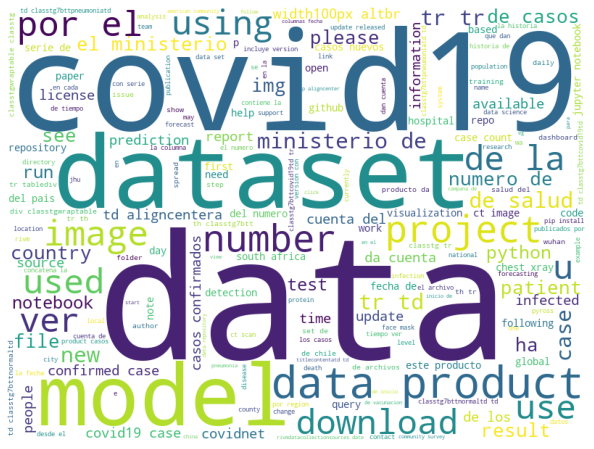

In [64]:
img = WordCloud(background_color='white', width=800, height=600).generate(jupyter_words)
plt.imshow(img)
plt.axis('off')

### HTML

(-0.5, 799.5, 599.5, -0.5)

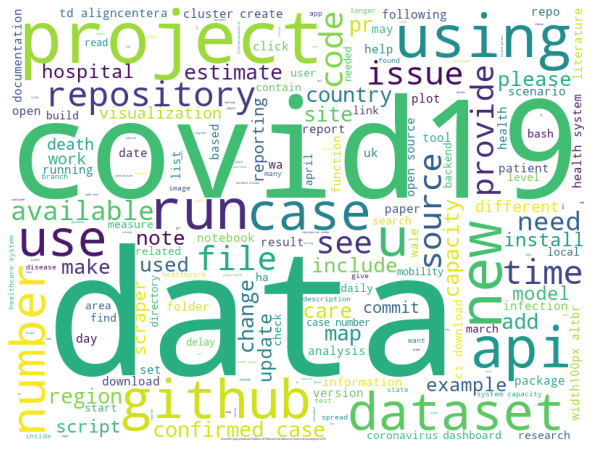

In [63]:
img = WordCloud(background_color='white', width=800, height=600).generate(html_words)
plt.imshow(img)
plt.axis('off')

### TypeScript

(-0.5, 799.5, 599.5, -0.5)

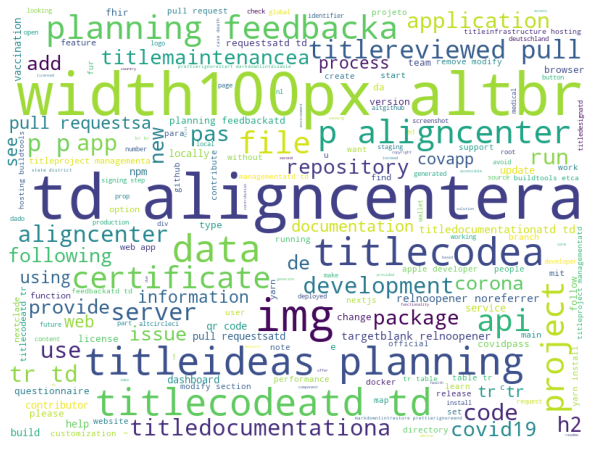

In [84]:
img = WordCloud(background_color='white', width=800, height=600).generate(type_words)
plt.imshow(img)
plt.axis('off')

### R

(-0.5, 799.5, 599.5, -0.5)

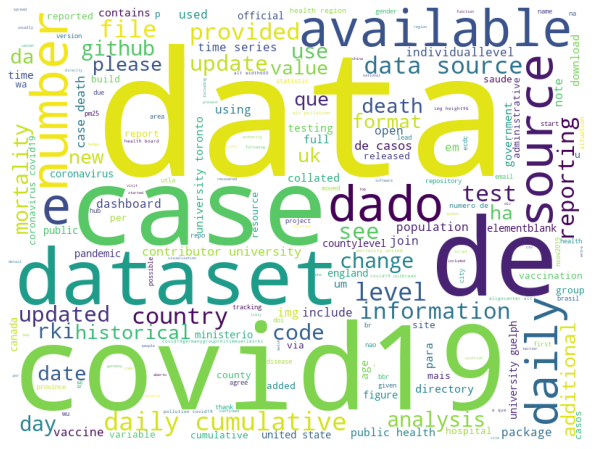

In [65]:
img = WordCloud(background_color='white', width=800, height=600).generate(r_words)
plt.imshow(img)
plt.axis('off')